# Practice Project - 6

# Advertising Sales Channel Prediction

# Problem Statement:
# Sales Channel Prediction Case Study  

* When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

* The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  



# Importing necessary libraries

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("Advertising.csv")
df


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [13]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
pd.set_option('display.max_rows', 200)

 * The above command will help us to read all the rows.

In [16]:
df.shape

(200, 4)

In [17]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [21]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
(df == 0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

* There is only 1 value of 0 in the dataset. It can be ignored.

# EDA

# Lets visialize the presence of outliers throgh boxplot.

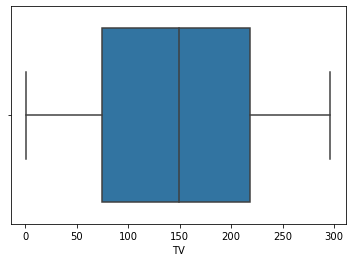

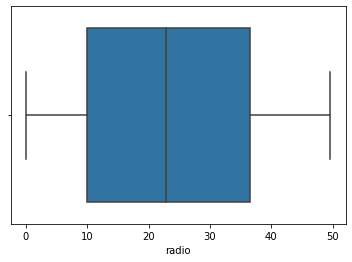

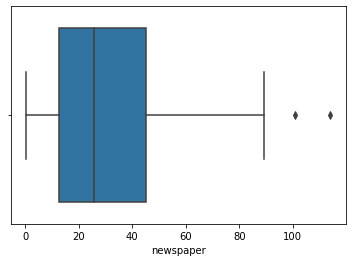

In [24]:
columns = ['TV','radio','newspaper']
for i in columns:
    sns.boxplot(df[i])
    plt.show()

# There are minor outliers present in newspaper. We have to treat it before model fitting

# Lets check the relationship of all the features with each other using pairplot`

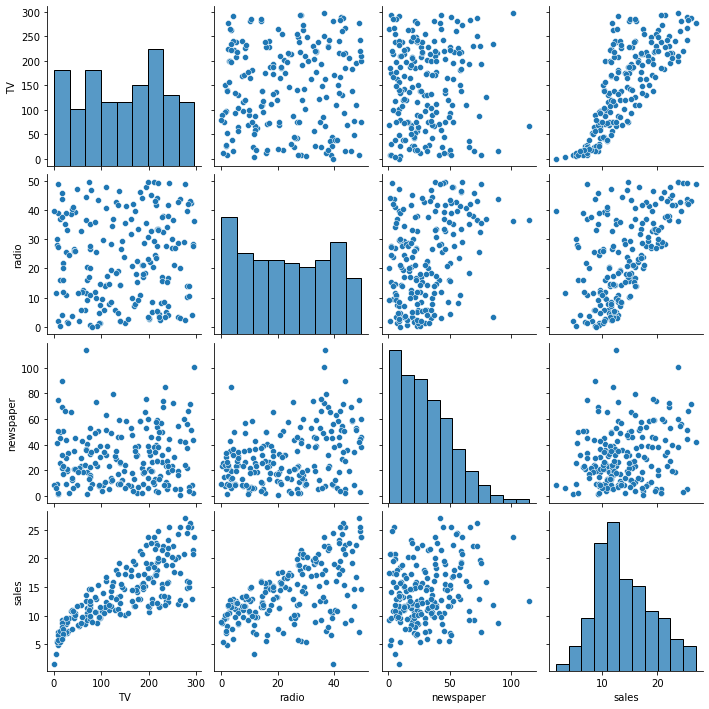

In [25]:
sns.pairplot(df)

* TV has good linear relationship with Sales followed by Radio.

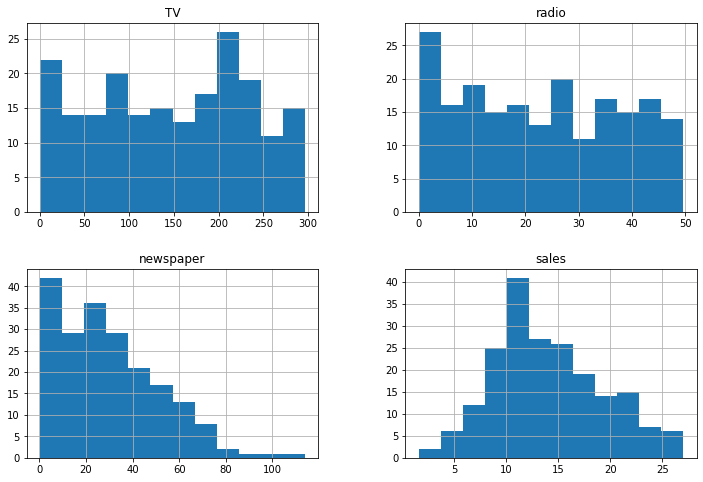

In [26]:
df.hist( bins = 12, figsize = (12,8))
plt.show()


 * Spending is more on TV and Radio and less on Newspaper

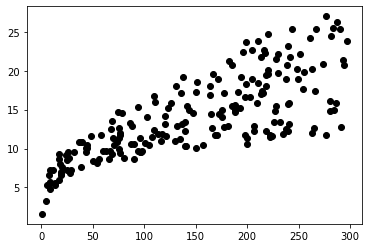

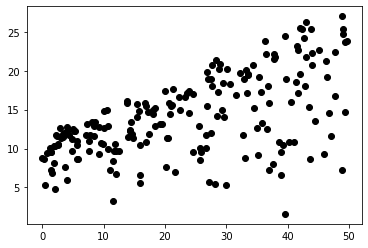

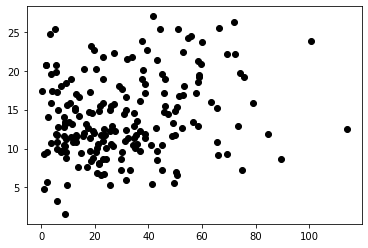

In [28]:
for i in columns:
    plt.scatter(x=df[i], y=df['sales'], c='black')
    plt.show()

<AxesSubplot:>

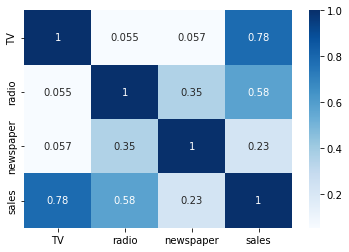

In [39]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

* As confirmed by other visualiztion, TV is the most co related with sales.

* No other features are corelated with each other.

# Data Cleaning
* Lets check for skewness now.

In [40]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [41]:
df['newspaper']=np.sqrt(df['newspaper'])

In [42]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

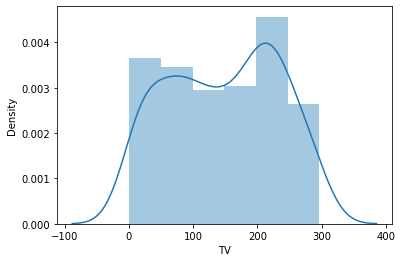

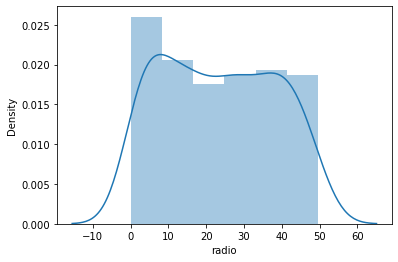

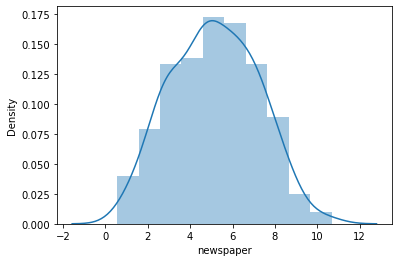

In [43]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

 * All our input features are normally distributed

* Splitting our data into input(x) and output(y) variable

In [44]:
x=df.drop(columns='sales')
y=df['sales']

* Now we will standardize our data.

* We wil be using StandardScaler for the same.

In [47]:
sc=StandardScaler()
sc_x=sc.fit_transform(x)

* We have fit the data to sc_x

In [49]:
x=sc_x

 * x is assign to sc_x

In [50]:
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

# Model Building

* We will use Linear regression model to check for the best random state to fit our training and test data`

In [52]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.9066668117866912
At random state 0,the testing accuracy is: 0.8598489884868329


At random state 1,the training accuracy is: 0.8960824841182068
At random state 1,the testing accuracy is: 0.891819980203109


At random state 2,the training accuracy is: 0.915522839623869
At random state 2,the testing accuracy is: 0.7546733523075342


At random state 3,the training accuracy is: 0.893231872053226
At random state 3,the testing accuracy is: 0.9124431849056786


At random state 4,the training accuracy is: 0.891222706408866
At random state 4,the testing accuracy is: 0.9082554516311409


At random state 5,the training accuracy is: 0.895655123210421
At random state 5,the testing accuracy is: 0.898557314658452


At random state 6,the training accuracy is: 0.8917655782026647
At random state 6,the testing accuracy is: 0.9209209716361928


At random state 7,the training accuracy is: 0.8929101547219346
At random state 7,the testing accuracy is: 0.909523758

* We will now split the data with the random_state 42 as that has given us the best accuracy on training and test data.

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

* Passing the model again

In [54]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 0.8957994678890562
The test accuracy of LinearRegression is 0.8994550077374865


# Fitting the data to SupportVectorRegression model

In [56]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8890378972252673
0.8019778933979981
0.9131799038362434


* Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

In [57]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.9131799038362434
The test accuracy of SVR is 0.8995851919787639


# Checking our model through DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9465602677134951


* The training accuracy is 1.0 through DTR but test accuracy is 0.92`

# Now Let's use Random Forest Regressor model

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9961148636078847
The test accuracy of RF is 0.9818690789923121


* So far RFR has given us the best accuracy on training and testing data`

# Cross Validation

 * We`ll cross validate our model

In [62]:
model=(lr,dt,sv,rf)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.8873331295445761


Mean Accuracy of DecisionTreeRegressor()
0.9540970319973672


Mean Accuracy of SVR()
0.9011953652320344


Mean Accuracy of RandomForestRegressor()
0.9742669363760033




In [78]:
Performance={'Model':['LR','SVR','DTR','RFR'],
           'Trainig Score':[0.89,0.91,1.0,0.99],
           'Testing score':[0.89,0.89,0.94,0.98],
           'CV Score':[0.88,0.95, 0.90, 0.97]}

In [79]:
Model=pd.DataFrame(data=Performance)

In [80]:
Model

,Model,Trainig Score,Testing score,CV Score
0,LR,0.89,0.89,0.88
1,SVR,0.91,0.89,0.95
2,DTR,1.00,0.94,0.90
3,RFR,0.99,0.98,0.97


 * We can conclude that RandomforestRegressor Model has performed best.


# Normalization and HyperTuning

* Importing the required libraries for normalizing the coefficients and Hypertuning our model

* Using Lasso for Normalization

* Lets check the best parameters for Lasso

In [81]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [82]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8982753162349368

In [83]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8884792606387284

# We got 0.89 score for training and 0.88 through cross validation from Lasso

* Select parameters for Hypertuning the RFR model

In [84]:
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [85]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

* Fitting the model to Grid Seach to check for the best parameters

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'auto'}

In [88]:
Finalmodel=RandomForestRegressor(criterion='mse', max_depth= 8, max_features= 'auto')
Finalmodel.fit(x_train,y_train)
pred_final=Finalmodel.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmodel,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 98.18067880038434
Cross Val score 97.55763975735616


# We have got good accuracy of 98% on training and 97% on Cross validation

 * Lets Visualize our model

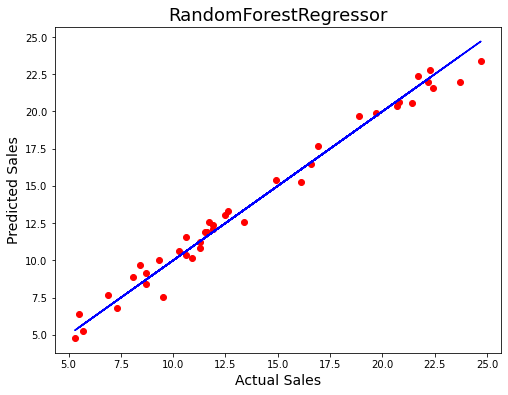

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

* We can see that the line fits near the predicted values. Hence we can conclude our model is performing well.

In [90]:
import joblib
joblib.dump(Finalmodel,'Advertising_Sales.obj')

['Advertising_Sales.obj']